In [263]:
import pandas as pd
import numpy as np
import seaborn as sns

In [264]:
# for modelling:

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
from sklearn import metrics

# importing Classification models

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from statsmodels.tools import add_constant as add_constant

import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import binarize
from sklearn.metrics import roc_curve

In [265]:
ibm=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [266]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [267]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [268]:
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [269]:
ibm.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [270]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [271]:
ibm.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [272]:
ibm.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [273]:
ibm.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [274]:
ibm.Education.value_counts()

3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64

In [275]:
ibm.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [276]:
ibm.EnvironmentSatisfaction.value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

In [277]:
ibm.Gender.value_counts() 

Male      882
Female    588
Name: Gender, dtype: int64

In [278]:
ibm.JobInvolvement.value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

In [279]:
ibm.JobLevel.value_counts()

1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

In [280]:
ibm.JobRole.value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [281]:
ibm.JobSatisfaction.value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [282]:
ibm.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [283]:
ibm.Over18.value_counts() #Same Value so we will drop this feature

Y    1470
Name: Over18, dtype: int64

In [284]:
ibm.OverTime.value_counts()

No     1054
Yes     416
Name: OverTime, dtype: int64

In [285]:
ibm.PerformanceRating.value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [286]:
ibm.RelationshipSatisfaction.value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

In [287]:
ibm.StockOptionLevel.value_counts()

0    631
1    596
2    158
3     85
Name: StockOptionLevel, dtype: int64

In [288]:
ibm.WorkLifeBalance.value_counts()

3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64

In [289]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [290]:
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [291]:
ibm.shape


(1470, 35)

# EDA

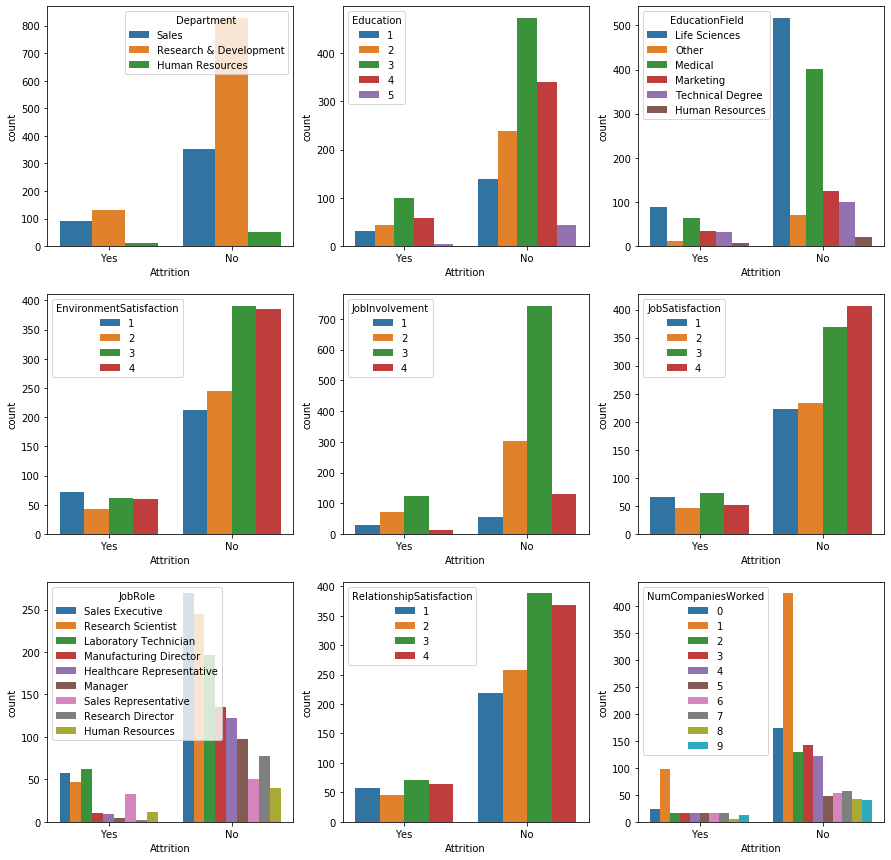

In [292]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import numpy as np


fig, axes = plt.subplots(nrows=3,ncols=3)
fig.set_size_inches(15, 15)
sns.countplot(ibm["Attrition"],data=ibm,hue="Department",ax=axes[0][0])
sns.countplot(ibm["Attrition"],data=ibm,hue="Education",ax=axes[0][1])
sns.countplot(ibm["Attrition"],data=ibm,hue="EducationField",ax=axes[0][2])
sns.countplot(ibm["Attrition"],data=ibm,hue="EnvironmentSatisfaction",ax=axes[1][0])
sns.countplot(ibm["Attrition"],data=ibm,hue="JobInvolvement",ax=axes[1][1])
sns.countplot(ibm["Attrition"],data=ibm,hue="JobSatisfaction",ax=axes[1][2])
sns.countplot(ibm["Attrition"],data=ibm,hue="JobRole",ax=axes[2][0])
sns.countplot(ibm["Attrition"],data=ibm,hue="RelationshipSatisfaction",ax=axes[2][1])
sns.countplot(ibm["Attrition"],data=ibm,hue="NumCompaniesWorked",ax=axes[2][2])

In [293]:
pd.crosstab(ibm['Attrition'],ibm['Department'])#.plot(kind='bar')

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,51,828,354
Yes,12,133,92


In [294]:
pd.crosstab(ibm['Attrition'],ibm['Education'])#.plot(kind='bar')

Education,1,2,3,4,5
Attrition,,,,,
No,139,238,473,340,43
Yes,31,44,99,58,5


In [295]:
pd.crosstab(ibm['Attrition'],ibm['EducationField'])#.plot(kind='bar')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,20,517,124,401,71,100
Yes,7,89,35,63,11,32


In [296]:
pd.crosstab(ibm['Attrition'],ibm['EnvironmentSatisfaction'])#.plot(kind='bar')

EnvironmentSatisfaction,1,2,3,4
Attrition,,,,
No,212,244,391,386
Yes,72,43,62,60


In [297]:
pd.crosstab(ibm['Attrition'],ibm['JobInvolvement'])#.plot(kind='bar')

JobInvolvement,1,2,3,4
Attrition,,,,
No,55,304,743,131
Yes,28,71,125,13


In [298]:
pd.crosstab(ibm['Attrition'],ibm['JobSatisfaction'])#.plot(kind='bar')

JobSatisfaction,1,2,3,4
Attrition,,,,
No,223,234,369,407
Yes,66,46,73,52


In [299]:
pd.crosstab(ibm['Attrition'],ibm['JobRole'])#.plot(kind='bar')

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,122,40,197,97,135,78,245,269,50
Yes,9,12,62,5,10,2,47,57,33


In [300]:
pd.crosstab(ibm['Attrition'],ibm['RelationshipSatisfaction'])#.plot(kind='bar')

RelationshipSatisfaction,1,2,3,4
Attrition,,,,
No,219,258,388,368
Yes,57,45,71,64


In [301]:
pd.crosstab(ibm['Attrition'],ibm['NumCompaniesWorked'])#.plot(kind='bar')

NumCompaniesWorked,0,1,2,3,4,5,6,7,8,9
Attrition,,,,,,,,,,
No,174,423,130,143,122,47,54,57,43,40
Yes,23,98,16,16,17,16,16,17,6,12


In [302]:
ibm.shape

(1470, 35)

In [303]:
ibm.StandardHours.value_counts() #Same value so we will drop this column

80    1470
Name: StandardHours, dtype: int64

In [304]:
ibm.Over18.value_counts() #Same value so we will drop this column

Y    1470
Name: Over18, dtype: int64

In [305]:
ibm.EmployeeCount.value_counts() #Same value so we will drop this column

1    1470
Name: EmployeeCount, dtype: int64

In [306]:
#Dropping Unwanted Columns

In [307]:
ibm.drop('StandardHours',axis=1,inplace=True)

In [308]:
ibm.drop('Over18',axis=1,inplace=True)

In [309]:
ibm.drop('EmployeeCount',axis=1,inplace=True)

In [310]:
ibm.shape

(1470, 32)

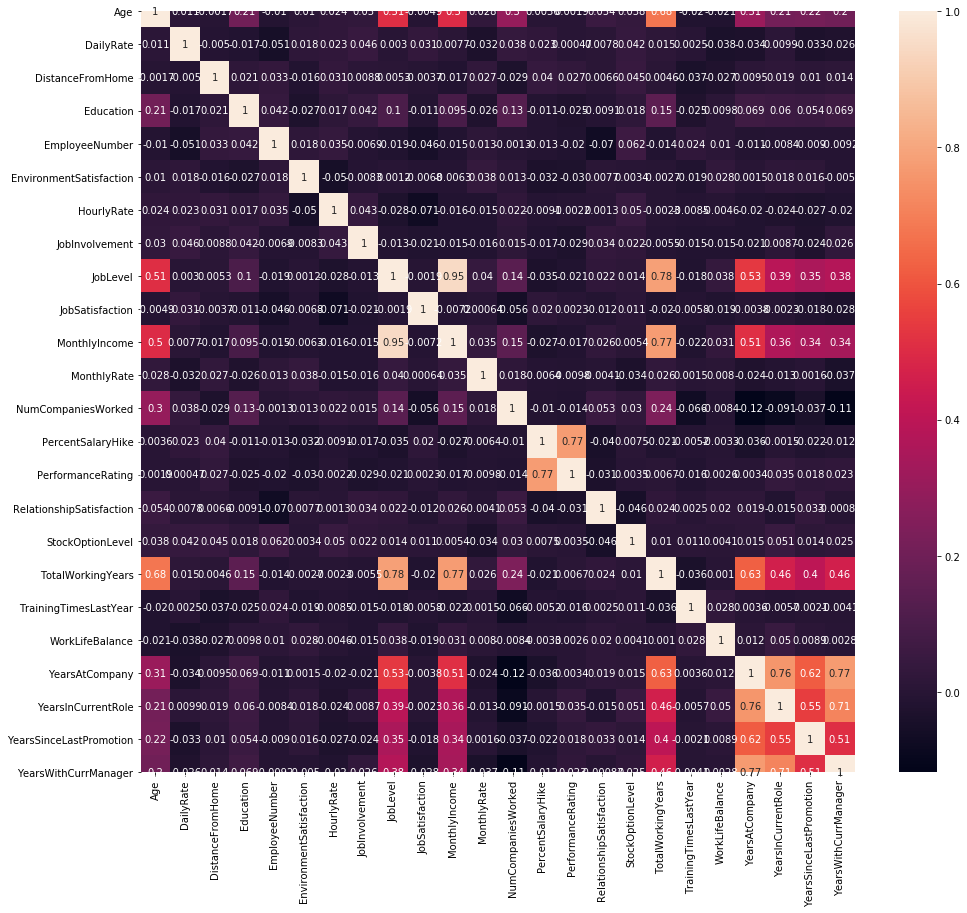

In [311]:
plt.figure(figsize=(16,14))
cor = ibm.corr()
sns.heatmap(cor,annot=True)

In [312]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [313]:
ibm.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany      

DailyRate  Distribution Plot


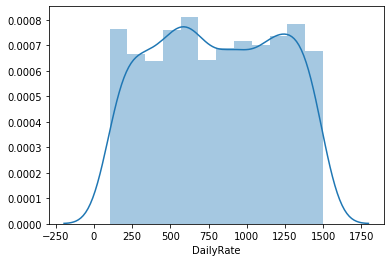

DistanceFromHome  Distribution Plot


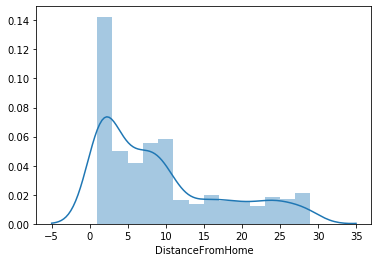

Education  Distribution Plot


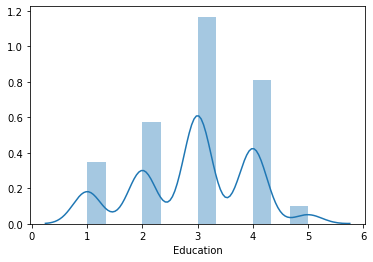

EmployeeNumber  Distribution Plot


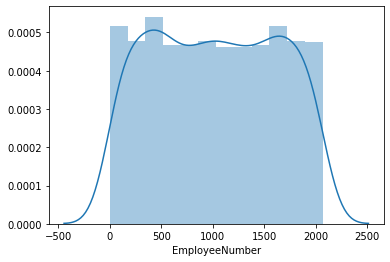

JobInvolvement  Distribution Plot


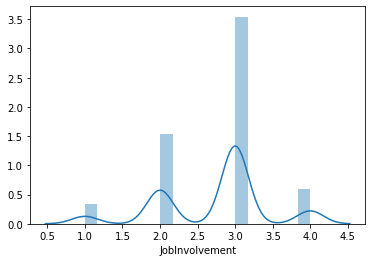

JobLevel  Distribution Plot


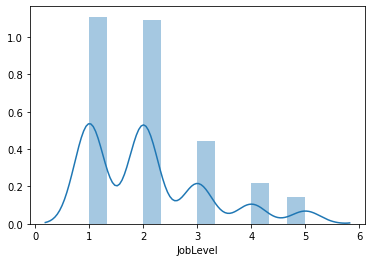

JobSatisfaction  Distribution Plot


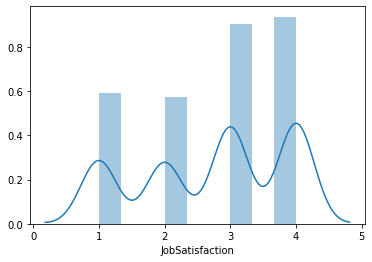

MonthlyIncome  Distribution Plot


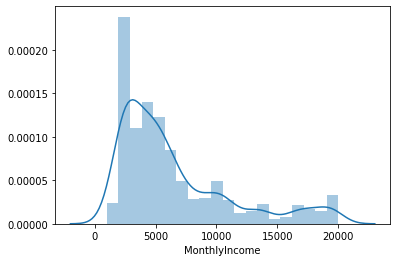

MonthlyRate  Distribution Plot


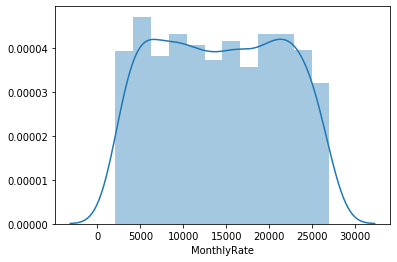

NumCompaniesWorked  Distribution Plot


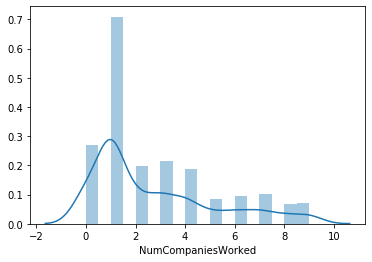

PercentSalaryHike  Distribution Plot


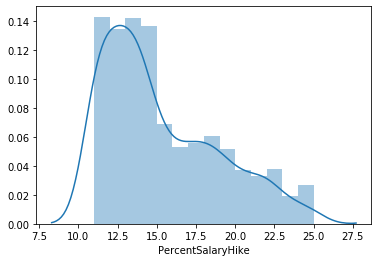

PerformanceRating  Distribution Plot


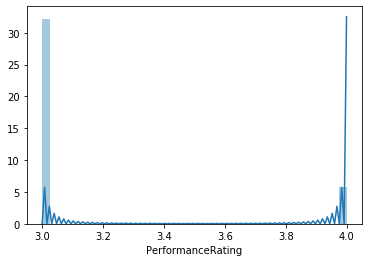

RelationshipSatisfaction  Distribution Plot


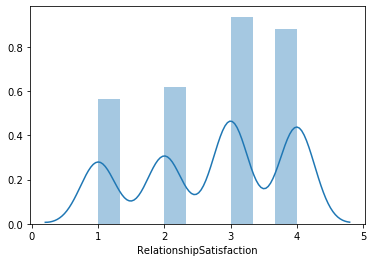

StockOptionLevel  Distribution Plot


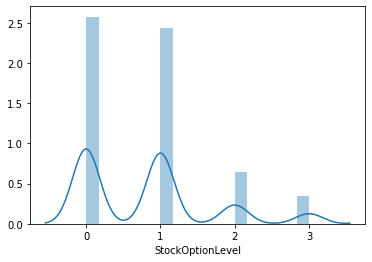

TotalWorkingYears  Distribution Plot


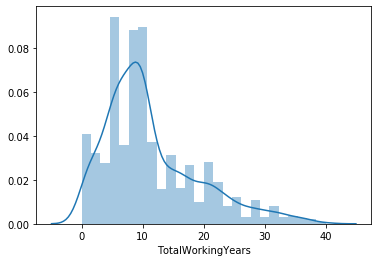

TrainingTimesLastYear  Distribution Plot


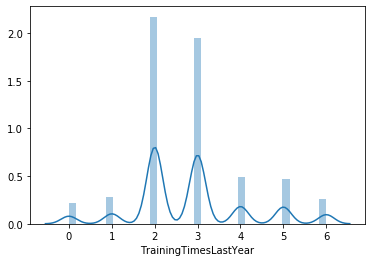

WorkLifeBalance  Distribution Plot


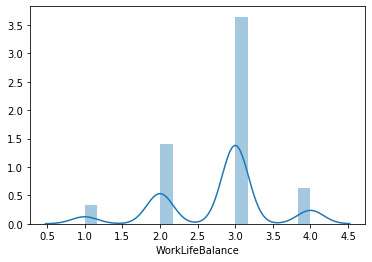

YearsAtCompany  Distribution Plot


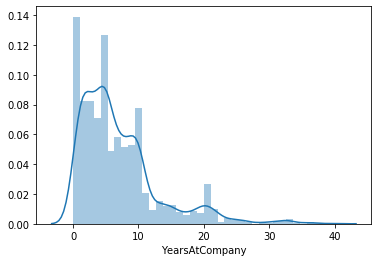

YearsInCurrentRole  Distribution Plot


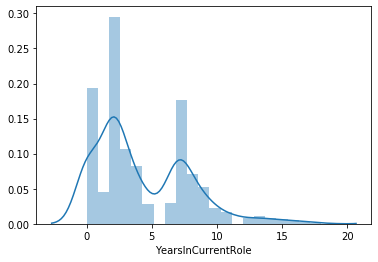

YearsSinceLastPromotion  Distribution Plot


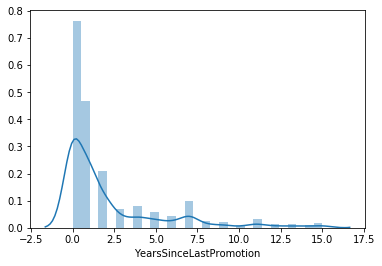

YearsWithCurrManager  Distribution Plot


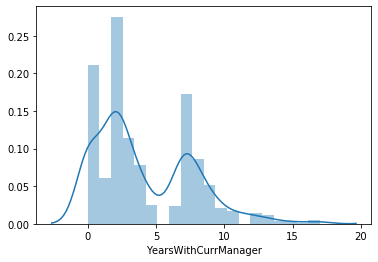

In [314]:
for cols in ibm[['DailyRate','DistanceFromHome','Education','EmployeeNumber','JobInvolvement','JobLevel',
                 'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
                 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]:
    sns.distplot(ibm[cols])
    print(cols,' Distribution Plot')
    plt.show()

DailyRate  Distribution Plot


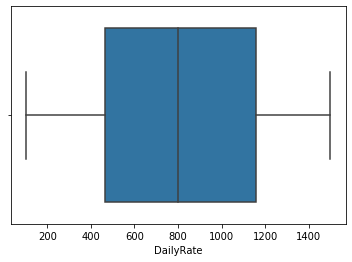

DistanceFromHome  Distribution Plot


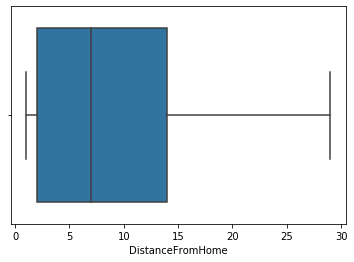

Education  Distribution Plot


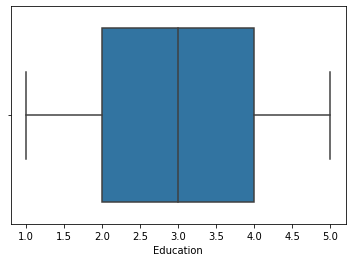

EmployeeNumber  Distribution Plot


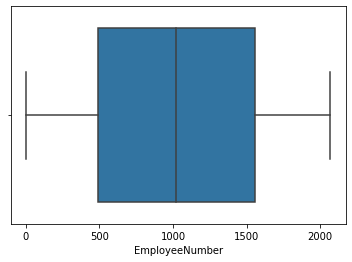

JobInvolvement  Distribution Plot


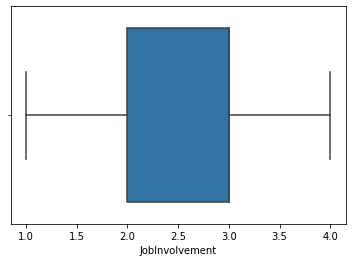

JobLevel  Distribution Plot


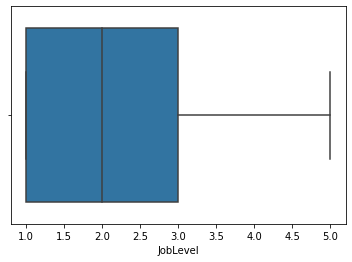

JobSatisfaction  Distribution Plot


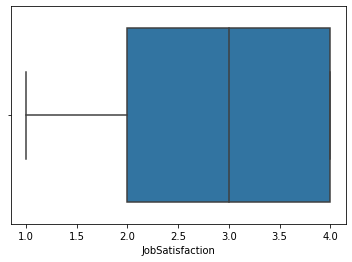

MonthlyIncome  Distribution Plot


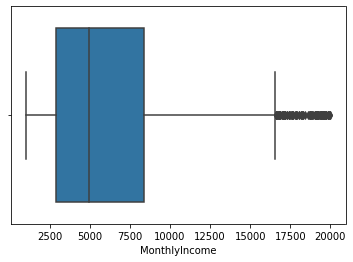

MonthlyRate  Distribution Plot


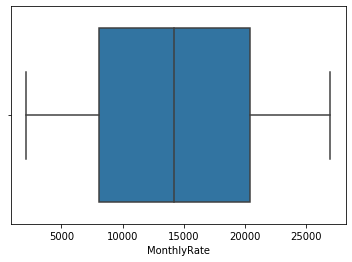

NumCompaniesWorked  Distribution Plot


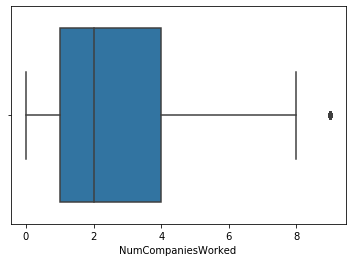

PercentSalaryHike  Distribution Plot


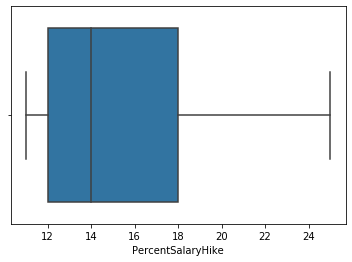

PerformanceRating  Distribution Plot


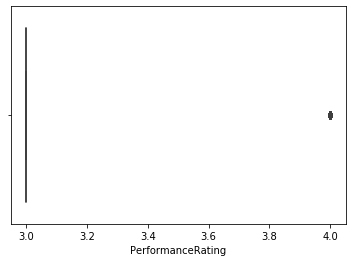

RelationshipSatisfaction  Distribution Plot


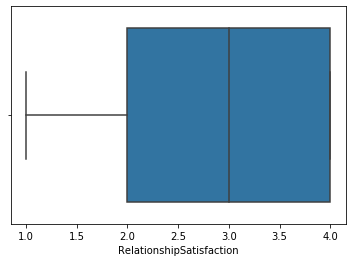

StockOptionLevel  Distribution Plot


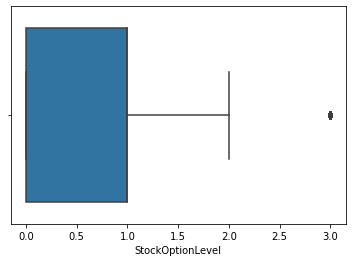

TotalWorkingYears  Distribution Plot


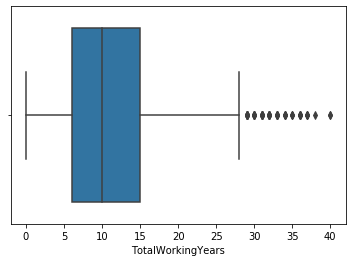

TrainingTimesLastYear  Distribution Plot


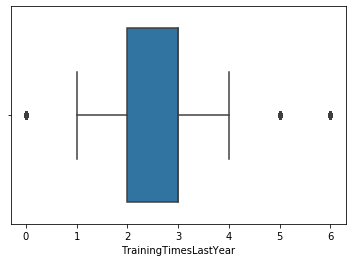

WorkLifeBalance  Distribution Plot


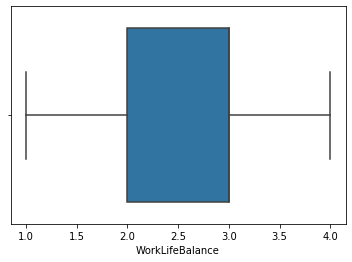

YearsAtCompany  Distribution Plot


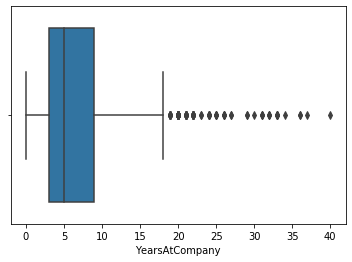

YearsInCurrentRole  Distribution Plot


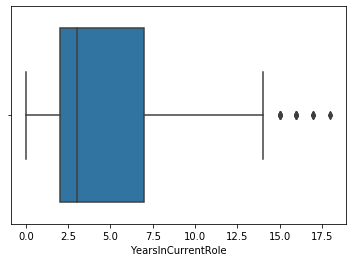

YearsSinceLastPromotion  Distribution Plot


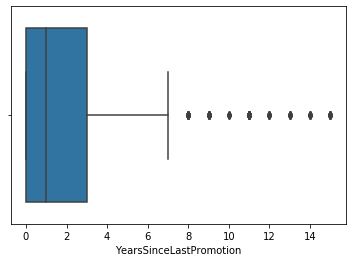

YearsWithCurrManager  Distribution Plot


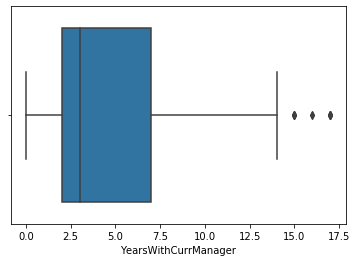

In [315]:
for cols in ibm[['DailyRate','DistanceFromHome','Education','EmployeeNumber','JobInvolvement','JobLevel',
                 'JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike',
                 'PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
                 'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany',
                 'YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]:
    sns.boxplot(ibm[cols])
    print(cols,' Distribution Plot')
    plt.show()

# Label Encoding

In [316]:
def Attr(x):
    if( x == 'Yes'):
        return 1
    else:
        return 0


ibm['Attrition']=ibm['Attrition'].apply(Attr)

ibm.Attrition.head(2)

0    1
1    0
Name: Attrition, dtype: int64

In [317]:
ibm.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [318]:
#BusinessTravel

In [319]:
def BussTra(x):
    if ( x == 'Non-Travel'):
        return 1
    elif( x == 'Travel_Rarely'):
        return 2
    else :
        return 3
ibm['BusinessTravel']=ibm['BusinessTravel'].apply(BussTra)
ibm.BusinessTravel.unique()
#BussTra('Travel_Frequently')

array([2, 3, 1], dtype=int64)

In [320]:
ibm.BusinessTravel.value_counts()

2    1043
3     277
1     150
Name: BusinessTravel, dtype: int64

In [321]:
#Department

In [322]:
def Dept(x):
    if (x == 'Sales'):
        return 1
    elif ( x == 'Research & Development'):
        return 2
    else :
        return 3
ibm['Department']=ibm['Department'].apply(Dept)
ibm.Department.unique()

array([1, 2, 3], dtype=int64)

In [323]:
ibm.Department.value_counts()

2    961
1    446
3     63
Name: Department, dtype: int64

In [324]:
def EduFld(x):
    if ( x == 'Human Resources'):
        return 1
    elif(x=='Life Sciences'):
        return 2
    elif(x=='Medical'):
        return 3
    elif(x=='Marketing'):
        return 4
    elif (x=='Technical Degree'):
        return 5
    else:
        return 6
ibm['EducationField']=ibm['EducationField'].apply(EduFld)
ibm.EducationField.value_counts()      

2    606
3    464
4    159
5    132
6     82
1     27
Name: EducationField, dtype: int64

In [325]:
def Gen(x):
    if (x== 'Male'):
        return 1
    else:
        return 2
ibm['Gender']=ibm['Gender'].apply(Gen)
ibm.Gender.value_counts()

1    882
2    588
Name: Gender, dtype: int64

In [326]:
#JobRole

In [327]:
def jobRole(x):
    if ( x == 'Sales Executive'):
        return 1
    elif(x=='Research Scientist'):
        return 2
    elif (x=='Laboratory Technician'):
        return 3
    elif (x =='Manufacturing Director'):
        return 4
    elif(x == 'Healthcare Representative'):
        return 5
    elif (x =='Manager'):
        return 6
    elif( x == 'Sales Representative'):
        return 7
    elif ( x == 'Research Director'):
        return 8
    else:
        return 9
ibm['JobRole']=ibm['JobRole'].apply(jobRole)
ibm.JobRole.value_counts()

1    326
2    292
3    259
4    145
5    131
6    102
7     83
8     80
9     52
Name: JobRole, dtype: int64

In [328]:
def mrg(x):
    if (x == 'Married'):
        return 2
    elif ( x == 'Single'):
        return 1
    else:
        return 3

ibm['MaritalStatus']=ibm['MaritalStatus'].apply(mrg)
ibm['MaritalStatus'].value_counts()

2    673
1    470
3    327
Name: MaritalStatus, dtype: int64

In [329]:
def OT(x):
    if( x == 'Yes'):
        return 1
    else:
        return 0


ibm['OverTime']=ibm['OverTime'].apply(OT)

ibm.OverTime.head(2)

0    1
1    0
Name: OverTime, dtype: int64

In [330]:
df1 =ibm.drop(['Attrition'],axis=1)


from sklearn.preprocessing import StandardScaler
sc =  StandardScaler()
x_std = sc.fit_transform(df1)

In [331]:
X=ibm.drop(['Attrition'],axis=1)
y=ibm['Attrition'].values

import statsmodels.api as sm


x_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     14.17
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           3.99e-63
Time:                        00:08:38   Log-Likelihood:                -419.32
No. Observations:                1470   AIC:                             902.6
Df Residuals:                    1438   BIC:                             1072.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.9163      0.136      6.742      0.000       0.650       1.183
Age                         -0.0036      0.001     -2.735      0.006      -0.006      -0.001
BusinessTravel               0.0802      0.016      4.997      0.000       0.049       0.112
DailyRate                -3.037e-05   2.13e-05     -1.426      0.154   -7.22e-05    1.14e-05
Department                  -0.0708      0.019     -3.712      0.000      -0.108      -0.033
DistanceFromHome             0.0036      0.001      3.437      0.001       0.002       0.006
Education                    0.0008      0.009      0.096      0.923      -0.016       0.018
EducationField               0.0095      0.007      1.322      0.187      -0.005       0.024
EmployeeNumber           -8.873e-06   1.43e-05     -0.622      0.534   -3.69e-05    1.91e-05
EnvironmentSatisfaction     -0.0402      0.008     -5.125      0.000      -0.056      -0.025
Gender                      -0.0416      0.018     -2.375      0.018      -0.076      -0.007
HourlyRate                  -0.0002      0.000     -0.475      0.635      -0.001       0.001
JobInvolvement              -0.0616      0.012     -5.116      0.000      -0.085      -0.038
JobLevel                    -0.0258      0.026     -0.984      0.325      -0.077       0.026
JobRole                      0.0143      0.005      3.089      0.002       0.005       0.023
JobSatisfaction             -0.0384      0.008     -4.934      0.000      -0.054      -0.023
MaritalStatus               -0.0550      0.016     -3.483      0.001      -0.086      -0.024
MonthlyIncome            -4.026e-06   6.17e-06     -0.653      0.514   -1.61e-05    8.07e-06
MonthlyRate               5.528e-07    1.2e-06      0.460      0.646   -1.81e-06    2.91e-06
NumCompaniesWorked           0.0176      0.004      4.600      0.000       0.010       0.025
OverTime                     0.2073      0.019     10.846      0.000       0.170       0.245
PercentSalaryHike           -0.0040      0.004     -1.086      0.278      -0.011       0.003
PerformanceRating            0.0278      0.037      0.745      0.457      -0.045       0.101
RelationshipSatisfaction    -0.0221      0.008     -2.775      0.006      -0.038      -0.006
StockOptionLevel            -0.0216      0.013     -1.601      0.110      -0.048       0.005
TotalWorkingYears           -0.0033      0.002     -1.394      0.163      -0.008       0.001
TrainingTimesLastYear       -0.0123      0.007     -1.855      0.064      -0.025       0.001
WorkLifeBalance             -0.0304      0.012     -2.500      0.013      -0.054      -0.007
YearsAtCompany               0.0062      0.003      2.096      0.036       0.000       0.012
YearsInCurrentRole          -0.0101      0.004     -2.611      0.009      -0.018      -0.003
YearsSinceLast

In [332]:
print(ibm.Attrition.value_counts()/len(ibm)*100)

0    83.877551
1    16.122449
Name: Attrition, dtype: float64


In [333]:
# Handling Imbalanced Dataset

In [334]:
from imblearn.over_sampling import SMOTE

X, y = SMOTE().fit_resample(X, y)
from collections import Counter
print(sorted(Counter(y).items()))

[(0, 1233), (1, 1233)]


In [335]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
BusinessTravel,1470.0,2.086395,0.532170,1.0,2.00,2.0,2.00,3.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.739456,0.527792,1.0,1.00,2.0,2.00,3.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,3.006122,1.206671,1.0,2.00,3.0,4.00,6.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
Gender,1470.0,1.400000,0.490065,1.0,1.00,1.0,2.00,2.0


In [336]:
X=ibm.drop(['Attrition','EmployeeNumber','MaritalStatus'],axis=1)
y=ibm['Attrition'].values

import statsmodels.api as sm


x_constant = sm.add_constant(X)
lin_reg = sm.OLS(y,x_constant).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.227
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     14.62
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           8.48e-62
Time:                        00:08:43   Log-Likelihood:                -425.62
No. Observations:                1470   AIC:                             911.2
Df Residuals:                    1440   BIC:                             1070.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.8319      0.133      6.232      0.000       0.570       1.094
Age                         -0.0039      0.001     -2.899      0.004      -0.006      -0.001
BusinessTravel               0.0812      0.016      5.042      0.000       0.050       0.113
DailyRate                -3.387e-05   2.13e-05     -1.589      0.112   -7.57e-05    7.94e-06
Department                  -0.0736      0.019     -3.846      0.000      -0.111      -0.036
DistanceFromHome             0.0037      0.001      3.467      0.001       0.002       0.006
Education                    0.0017      0.009      0.200      0.841      -0.015       0.019
EducationField               0.0090      0.007      1.243      0.214      -0.005       0.023
EnvironmentSatisfaction     -0.0402      0.008     -5.099      0.000      -0.056      -0.025
Gender                      -0.0379      0.018     -2.162      0.031      -0.072      -0.004
HourlyRate                  -0.0002      0.000     -0.404      0.687      -0.001       0.001
JobInvolvement              -0.0629      0.012     -5.202      0.000      -0.087      -0.039
JobLevel                    -0.0261      0.026     -0.991      0.322      -0.078       0.026
JobRole                      0.0137      0.005      2.965      0.003       0.005       0.023
JobSatisfaction             -0.0369      0.008     -4.739      0.000      -0.052      -0.022
MonthlyIncome            -4.254e-06   6.19e-06     -0.687      0.492   -1.64e-05    7.89e-06
MonthlyRate                5.41e-07   1.21e-06      0.448      0.654   -1.83e-06    2.91e-06
NumCompaniesWorked           0.0176      0.004      4.591      0.000       0.010       0.025
OverTime                     0.2060      0.019     10.742      0.000       0.168       0.244
PercentSalaryHike           -0.0037      0.004     -0.999      0.318      -0.011       0.004
PerformanceRating            0.0265      0.038      0.706      0.480      -0.047       0.100
RelationshipSatisfaction    -0.0217      0.008     -2.728      0.006      -0.037      -0.006
StockOptionLevel            -0.0531      0.010     -5.258      0.000      -0.073      -0.033
TotalWorkingYears           -0.0033      0.002     -1.365      0.173      -0.008       0.001
TrainingTimesLastYear       -0.0120      0.007     -1.801      0.072      -0.025       0.001
WorkLifeBalance             -0.0294      0.012     -2.415      0.016      -0.053      -0.006
YearsAtCompany               0.0059      0.003      1.982      0.048    6.08e-05       0.012
YearsInCurrentRole          -0.0102      0.004     -2.628      0.009      -0.018      -0.003
YearsSinceLastPromotion      0.0115      0.003      3.370      0.001       0.005       0.018
YearsWithCurrManager        -0.0098      0.004     -2.454      0.014      -0.018      -0.002
==============

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif = [variance_inflation_factor(x_constant.values,i)
      for i in range(x_constant.shape[1])]
pd.DataFrame({'vif':vif[1:]},index=X.columns) 

,vif
Age,2.049595
BusinessTravel,1.012834
DailyRate,1.018862
Department,1.405135
DistanceFromHome,1.016958
Education,1.063058
EducationField,1.051531
EnvironmentSatisfaction,1.020449
Gender,1.017793
HourlyRate,1.019606


In [338]:
ibm.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [339]:
ibm_new = ibm.drop(['EmployeeNumber','MaritalStatus','MonthlyIncome','JobLevel'],axis=1)
ibm_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,1,1,2,2,2,2,...,3,1,0,8,0,1,6,4,0,5
1,49,0,3,279,2,8,1,2,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,2,2,2,6,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,3,1392,2,3,4,2,4,2,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,2,2,1,3,1,1,...,3,4,1,6,3,3,2,2,2,2


In [340]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

In [341]:
import warnings
warnings.filterwarnings('ignore') 

In [342]:
from sklearn import model_selection
X = ibm_new.drop(['Attrition'],axis=1)
Y = ibm_new['Attrition']
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size=0.30, random_state=42)

In [343]:
model =LogisticRegression()
model.fit(X_train,Y_train)
Y_pred=model.predict(X_test)

In [344]:
from sklearn.metrics import confusion_matrix

print(metrics.confusion_matrix(Y_test,Y_pred))

[[371   9]
 [ 44  17]]


In [345]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Naive Bayes', GaussianNB()))
models.append(('Adaboost',AdaBoostClassifier()))
models.append(('Gradient',GradientBoostingClassifier()))
models.append(('Bagging',BaggingClassifier()))

#models.append(('SVM',SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.866857 (0.049142)
KNN: 0.813411 (0.041368)
Decision Tree: 0.760927 (0.031706)
RandomForest: 0.846421 (0.041964)
Naive Bayes: 0.819265 (0.040916)
Adaboost: 0.863012 (0.039090)
Gradient: 0.856158 (0.032491)
Bagging: 0.835722 (0.050693)


In [346]:
Model = ['LogisticRegression','KNeighborsClassifier','Naive Bayes','DecisionTreeClassifier','RandomForest','AdaBoost',
         'GradientBoost','Bagging']
Scores = [0.866857,0.813411,0.763821,0.852256,0.819265,0.863012,0.855188,0.834809]

evaluation = pd.DataFrame({'Model': Model,
                           'Scores'   :  Scores,
                          })
print("FOLLOWING ARE THE TRAINING SCORES: ")
evaluation

FOLLOWING ARE THE TRAINING SCORES: 


,Model,Scores
0,LogisticRegression,0.866857
1,KNeighborsClassifier,0.813411
2,Naive Bayes,0.763821
3,DecisionTreeClassifier,0.852256
4,RandomForest,0.819265
5,AdaBoost,0.863012
6,GradientBoost,0.855188
7,Bagging,0.834809


# Logistic Regression

In [347]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,roc_auc_score
LR = LogisticRegression()
LR.fit(X_train,Y_train)
y_pred_lr = LR.predict(X_test)

In [348]:
cm=confusion_matrix(Y_test,y_pred_lr)
print(cm)
acc=accuracy_score(Y_test,y_pred_lr)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_lr, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_lr,average = 'macro')*100)
print(classification_report(Y_test,y_pred_lr))

[[371   9]
 [ 44  17]]
accuracy_score 87.98185941043084
f1_score for knn 66.20689655172414
precision for knn 77.39110287303058
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       380
           1       0.65      0.28      0.39        61

    accuracy                           0.88       441
   macro avg       0.77      0.63      0.66       441
weighted avg       0.86      0.88      0.86       441



# KN_CLassifier

In [349]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=7,p=2,metric='euclidean')
classifier.fit(X_train,Y_train)
y_pred_k=classifier.predict(X_test)

In [350]:
cm=confusion_matrix(Y_test,y_pred_k)
print(cm)
acc=accuracy_score(Y_test,y_pred_k)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_k, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_k,average = 'macro')*100)
print(classification_report(Y_test,y_pred_k))

[[372   8]
 [ 59   2]]
accuracy_score 84.80725623582767
f1_score for knn 48.686198572445775
precision for knn 53.15545243619489
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       380
           1       0.20      0.03      0.06        61

    accuracy                           0.85       441
   macro avg       0.53      0.51      0.49       441
weighted avg       0.77      0.85      0.80       441



# NAVIE BAYES

In [351]:
cl_nav=GaussianNB()
cl_nav.fit(X_train,Y_train)
y_pred_nav=cl_nav.predict(X_test)

In [352]:
cm=confusion_matrix(Y_test,y_pred_nav)
print(cm)
acc=accuracy_score(Y_test,y_pred_nav)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_nav, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_nav,average = 'macro')*100)
print(classification_report(Y_test,y_pred_nav))

[[349  31]
 [ 30  31]]
accuracy_score 86.16780045351474
f1_score for knn 71.18480670972718
precision for knn 71.04221635883906
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       380
           1       0.50      0.51      0.50        61

    accuracy                           0.86       441
   macro avg       0.71      0.71      0.71       441
weighted avg       0.86      0.86      0.86       441



# Decision Tree

In [353]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold

params = {
    
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(1,10,1),
    'max_leaf_nodes':range(2,10,1),
    'max_features':['auto','log2']
    
}

dt = DecisionTreeClassifier()

gs = GridSearchCV(estimator=dt,n_jobs=-1,cv=3,param_grid=params,scoring='recall')
gs.fit(X,Y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'm

In [354]:
dt = DecisionTreeClassifier(**gs.best_params_)
dt.fit(X_train,Y_train)
y_pred_dt = dt.predict(X_test)

In [355]:
cm=confusion_matrix(Y_test,y_pred_dt)
print(cm)
acc=accuracy_score(Y_test,y_pred_dt)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_dt, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_dt,average = 'macro')*100)
print(classification_report(Y_test,y_pred_dt))

[[376   4]
 [ 60   1]]
accuracy_score 85.4875283446712
f1_score for knn 47.59358288770053
precision for knn 53.11926605504588
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       380
           1       0.20      0.02      0.03        61

    accuracy                           0.85       441
   macro avg       0.53      0.50      0.48       441
weighted avg       0.77      0.85      0.80       441



# RandomForest

In [356]:
from sklearn.ensemble import RandomForestClassifier 

In [357]:
fit_rf = RandomForestClassifier(random_state=42)

In [358]:
import time
import random
np.random.seed(42)
start = time.time()

param_dist = {'max_depth': [10,11,12],'bootstrap': [True, False],'max_features': ['auto', 'sqrt', 'log2', None],'criterion': ['gini', 'entropy']}

cv_rf = GridSearchCV(fit_rf, cv = 10,param_grid=param_dist, n_jobs = 3)

cv_rf.fit(X_train,Y_train)
y_pred_rft = cv_rf.predict(X_test)
print('Best Parameters using grid search: \n', cv_rf.best_params_)
end = time.time()
print('Time taken in grid search: {0: .2f}'.format(end - start))

Best Parameters using grid search: 
 {'bootstrap': True, 'criterion': 'gini', 'max_depth': 12, 'max_features': 'log2'}
Time taken in grid search:  13.00


In [359]:
cm=confusion_matrix(Y_test,y_pred_rft)
print(cm)
acc=accuracy_score(Y_test,y_pred_rft)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_rft, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_rft,average = 'macro')*100)
print(classification_report(Y_test,y_pred_rft))

[[371   9]
 [ 52   9]]
accuracy_score 86.16780045351474
f1_score for knn 57.594148525308576
precision for knn 68.85342789598108
              precision    recall  f1-score   support

           0       0.88      0.98      0.92       380
           1       0.50      0.15      0.23        61

    accuracy                           0.86       441
   macro avg       0.69      0.56      0.58       441
weighted avg       0.82      0.86      0.83       441



# SVC

In [366]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)
y_pred_svc = svc.predict(X_test)
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, Y_test)))

Accuracy on test set: 0.86


In [367]:
cm=confusion_matrix(Y_test,y_pred_svc)
print(cm)
acc=accuracy_score(Y_test,y_pred_svc)*100
print("accuracy_score",acc)
print("f1_score for knn",f1_score(Y_test,y_pred_svc, average = 'macro')*100)
print("precision for knn",precision_score(Y_test,y_pred_svc,average = 'macro')*100)
print(classification_report(Y_test,y_pred_svc))

[[380   0]
 [ 61   0]]
accuracy_score 86.16780045351474
f1_score for knn 46.28501827040195
precision for knn 43.08390022675737
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       380
           1       0.00      0.00      0.00        61

    accuracy                           0.86       441
   macro avg       0.43      0.50      0.46       441
weighted avg       0.74      0.86      0.80       441



In [373]:
Model = ['LogisticRegression','KNeighborsClassifier','Naive Bayes','DecisionTreeClassifier','RandomForest']
Accuracy_Scores = [87.981,84.80725,86.1678,85.48752,86.16780]

evaluation = pd.DataFrame({'Model': Model,
                           'Accuracy_Scores'   : Accuracy_Scores,
                          })
print("FOLLOWING ARE THE Accuracy_Scores SCORES: ")
evaluation

FOLLOWING ARE THE Accuracy_Scores SCORES: 


,Model,Accuracy_Scores
0,LogisticRegression,87.98100
1,KNeighborsClassifier,84.80725
2,Naive Bayes,86.16780
3,DecisionTreeClassifier,85.48752
4,RandomForest,86.16780
